# Data Sience Final Exam

Họ và Tên: Trần Ngọc Khánh Văn


Mã số sinh viện: N20DCCN084

Lớp: D20CQCNHT01-N

# Data Information


 Citation Request:
  This dataset is public available for research. The details are described in [Cortez et al., 2009]. 
  Please include this citation if you plan to use this database:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

1. Title: Wine Quality 

2. Sources
   Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009
   
3. Past Usage:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  In the above reference, two datasets were created, using red and white wine samples.
  The inputs include objective tests (e.g. PH values) and the output is based on sensory data
  (median of at least 3 evaluations made by wine experts). Each expert graded the wine quality 
  between 0 (very bad) and 10 (very excellent). Several data mining methods were applied to model
  these datasets under a regression approach. The support vector machine model achieved the
  best results. Several metrics were computed: MAD, confusion matrix for a fixed error tolerance (T),
  etc. Also, we plot the relative importances of the input variables (as measured by a sensitivity
  analysis procedure).
 
4. Relevant Information:

   The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.
   For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].
   Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables 
   are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

   These datasets can be viewed as classification or regression tasks.
   The classes are ordered and not balanced (e.g. there are munch more normal wines than
   excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent
   or poor wines. Also, we are not sure if all input variables are relevant. So
   it could be interesting to test feature selection methods. 

5. Number of Instances: red wine - 1599; white wine - 4898. 

6. Number of Attributes: 11 + output attribute
  
   Note: several of the attributes may be correlated, thus it makes sense to apply some sort of
   feature selection.

7. Attribute information:

   For more information, read [Cortez et al., 2009].

   Input variables (based on physicochemical tests):
   1 - fixed acidity
   2 - volatile acidity
   3 - citric acid
   4 - residual sugar
   5 - chlorides
   6 - free sulfur dioxide
   7 - total sulfur dioxide
   8 - density
   9 - pH
   10 - sulphates
   11 - alcohol
   Output variable (based on sensory data): 
   12 - quality (score between 0 and 10)

8. Missing Attribute Values: None

# Add Module


In [299]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Read Data From CSV

In [300]:
#Read data from csv
#Change the file name to switch between red wine and white wine
redWine_data = pd.read_csv('winequality-red.csv',sep=';')
whiteWine_data = pd.read_csv('winequality-white.csv',sep=';')

# Preprocessing Data


In [301]:
#Shape of the data
whiteWine_data.shape

(4898, 12)

In [302]:
redWine_data.shape

(1599, 12)

In [303]:
redWine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [304]:
whiteWine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [305]:
redWine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [306]:
whiteWine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [307]:
redWine_data['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [308]:
whiteWine_data['quality'].value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

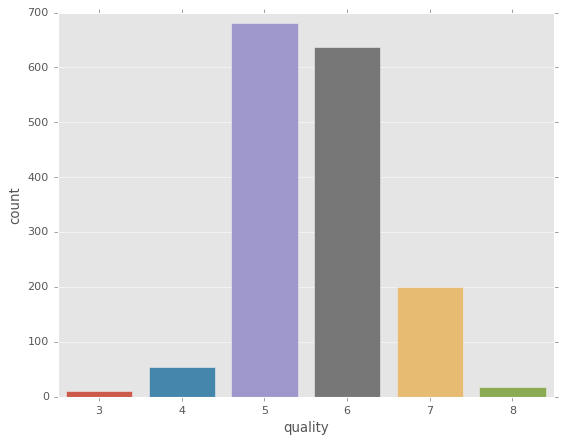

In [309]:
style.use('ggplot')
sns.countplot(x='quality' ,data=redWine_data)

<Axes: xlabel='quality', ylabel='count'>

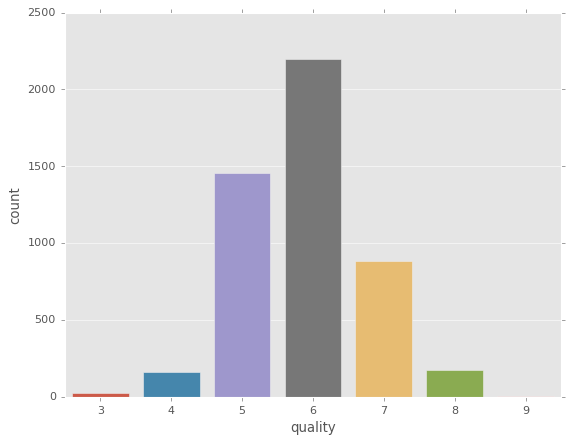

In [310]:
style.use('ggplot')
sns.countplot(x='quality' ,data=whiteWine_data)

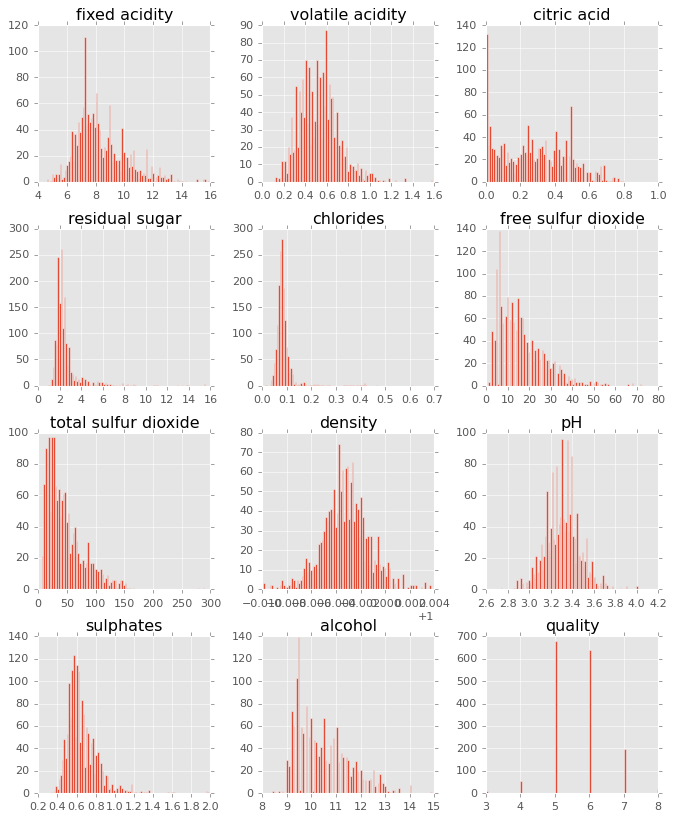

In [311]:
redWine_data.hist(bins=100, figsize=(10,12))
plt.show()

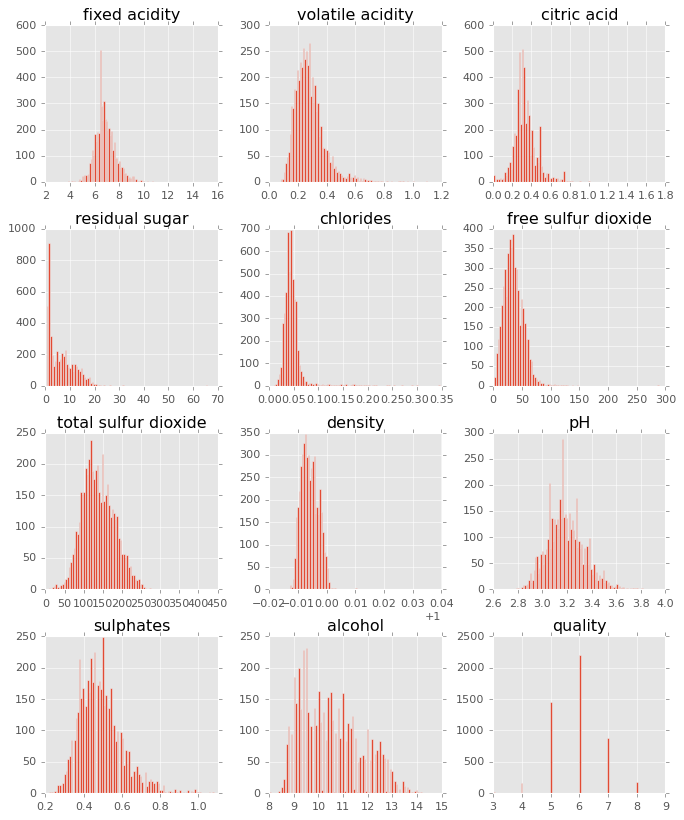

In [312]:
whiteWine_data.hist(bins=100, figsize=(10,12))
plt.show()

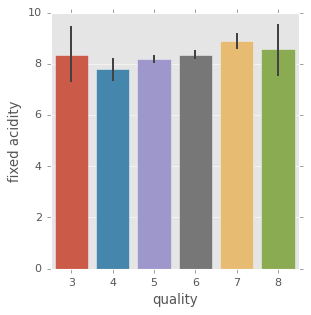

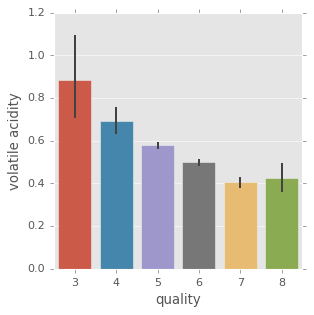

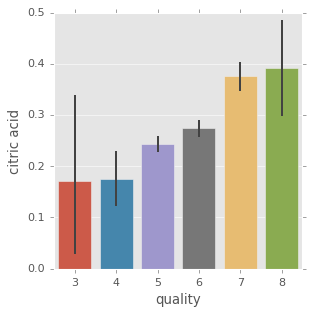

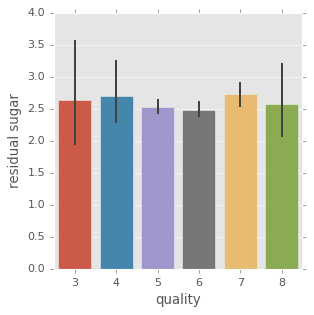

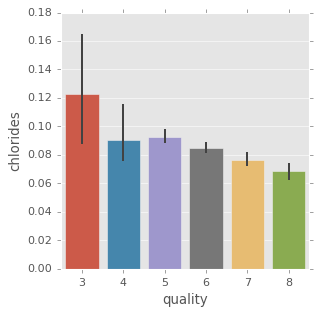

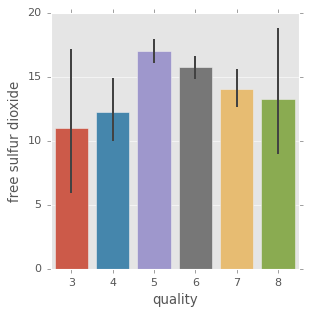

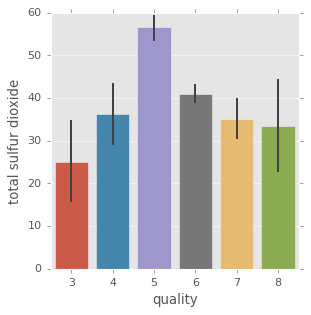

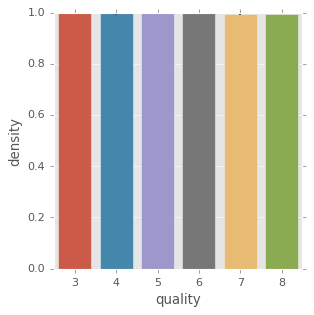

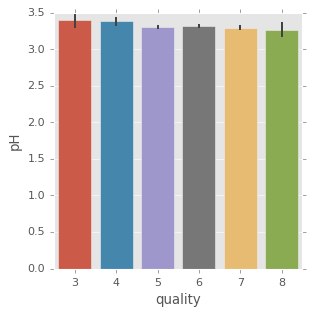

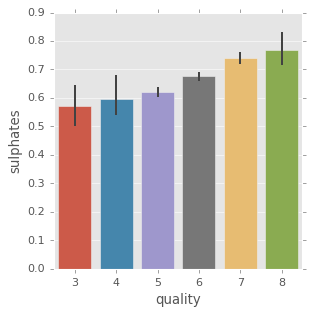

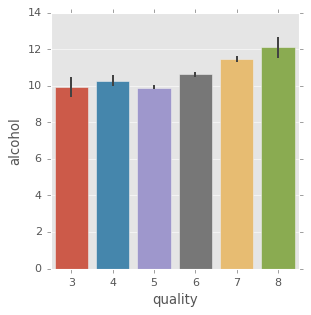

In [313]:
#check which element effect the quality the most
s=["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide",
   "total sulfur dioxide","density","pH","sulphates","alcohol"]
for i in s:
    plot = plt.figure(figsize=(4,4))
    sns.barplot(x='quality', y=i, data=redWine_data)

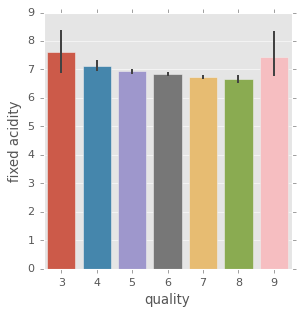

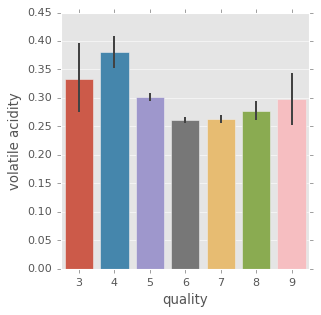

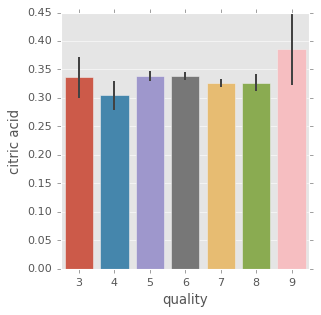

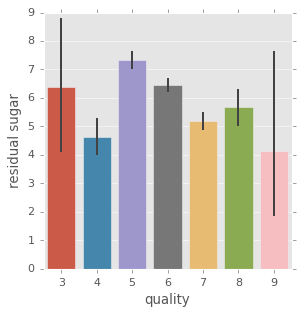

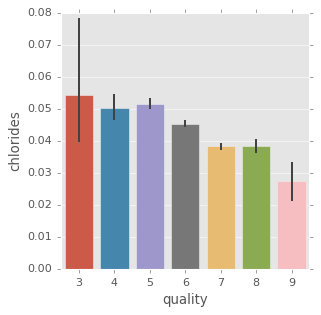

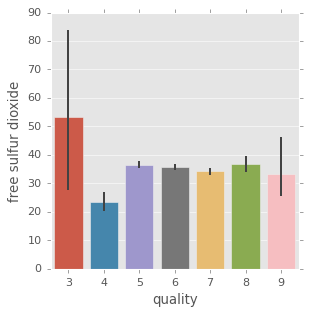

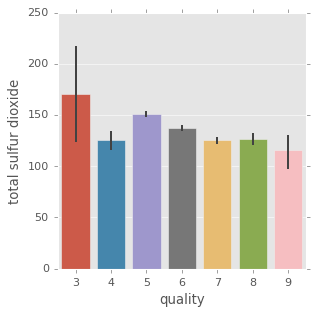

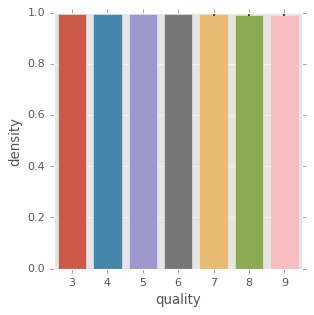

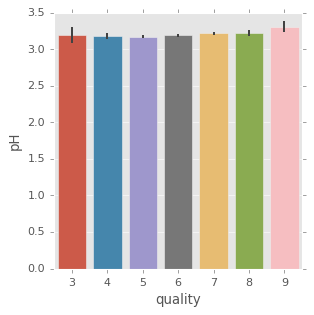

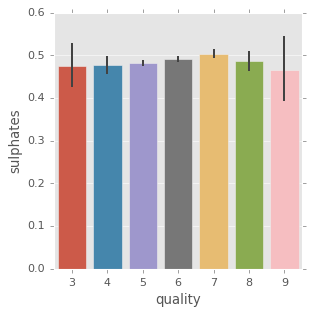

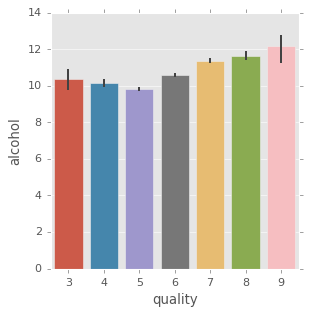

In [314]:
#check which element effect the quality the most
s=["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide",
   "total sulfur dioxide","density","pH","sulphates","alcohol"]
for i in s:
    plot = plt.figure(figsize=(4,4))
    sns.barplot(x='quality', y=i, data=whiteWine_data)

<Axes: >

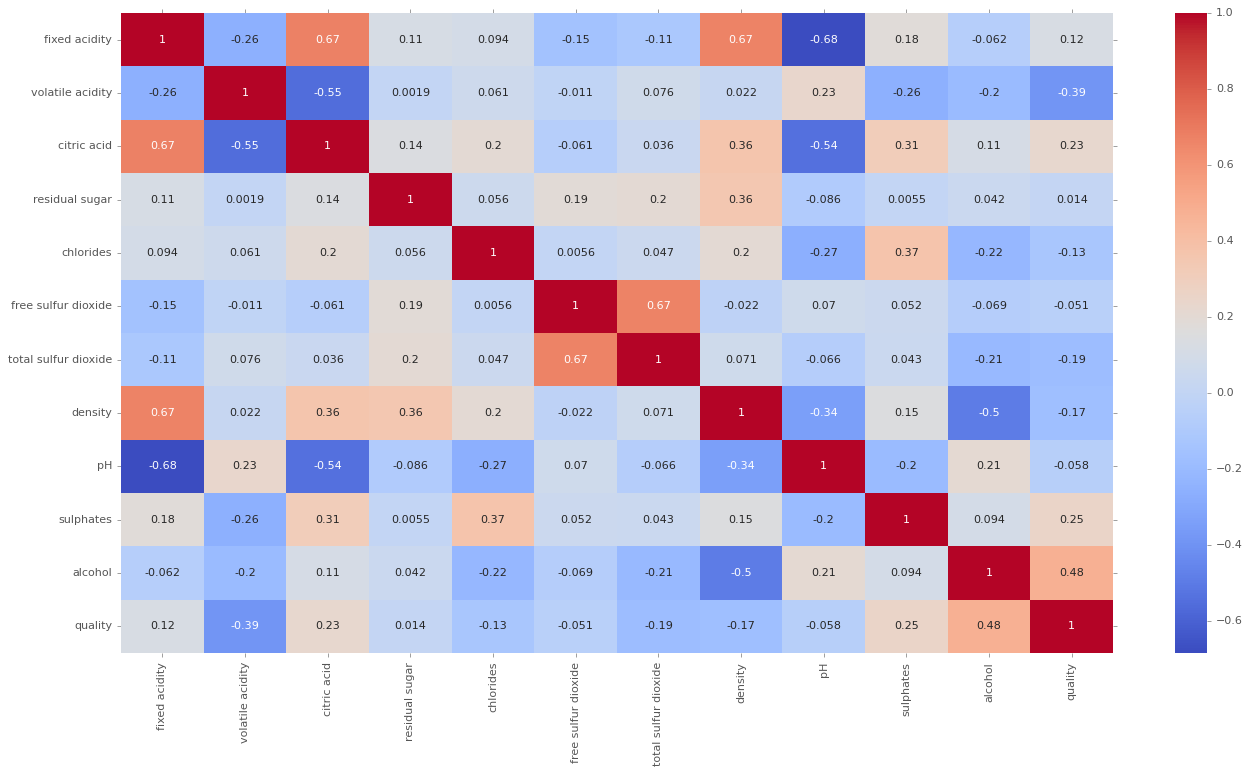

In [315]:
corr = redWine_data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

<Axes: >

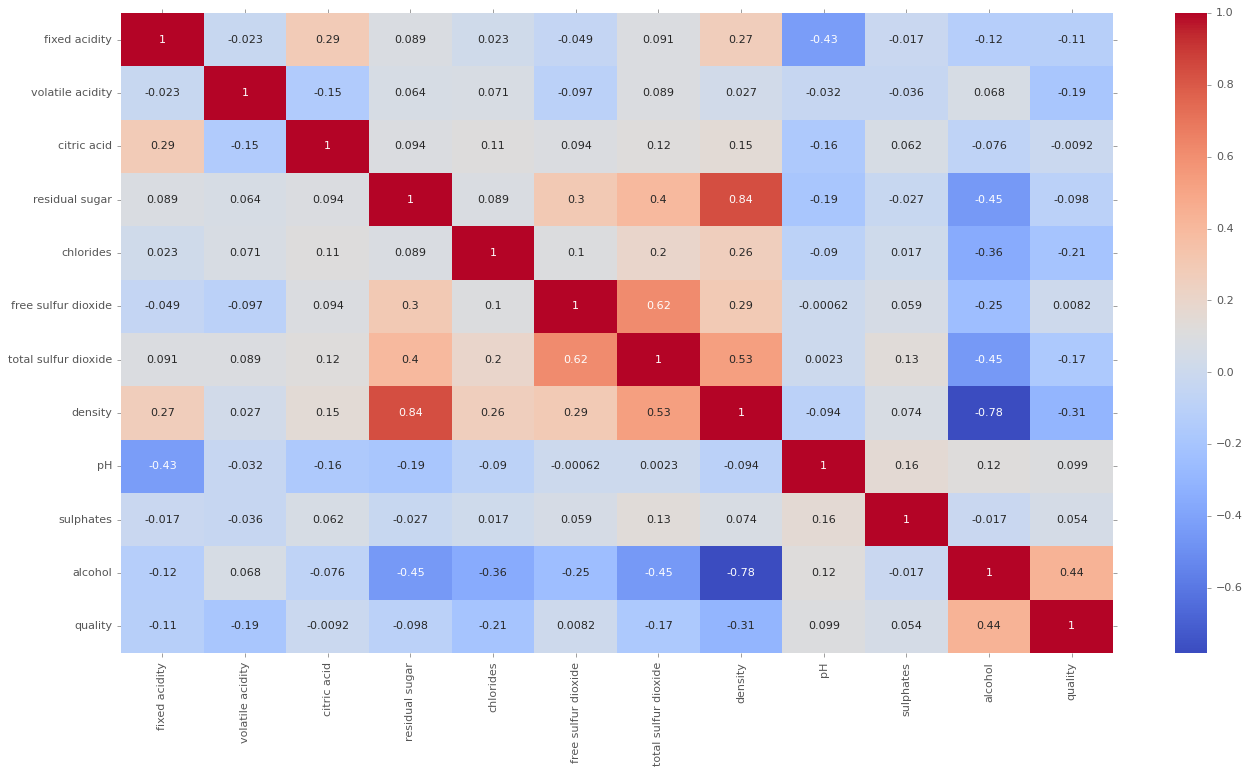

In [316]:
corr = whiteWine_data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Split Processing



In [321]:
# #Quality >7 mean good wine and = 1
# #Quality <7 mean not good wine and =0
redWine_data['quality'] = redWine_data.quality.apply(lambda x:1 if x>=7 else 0)
whiteWine_data['quality'] = whiteWine_data.quality.apply(lambda x:1 if x>=7 else 0)


In [322]:
X = redWine_data.drop('quality', axis=1)
y = redWine_data['quality']
X1 = whiteWine_data.drop('quality', axis=1)
y1 = whiteWine_data['quality']

In [323]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size=0.2, random_state=42)

In [324]:
print("X_train ", X_train.shape)
print("y_train ", y_train.shape)
print("X_test ", X_test.shape)
print("y_test ", y_test.shape)

X_train  (1279, 11)
y_train  (1279,)
X_test  (320, 11)
y_test  (320,)


In [325]:
print("X1_train ", X1_train.shape)
print("y1_train ", y1_train.shape)
print("X1_test ", X1_test.shape)
print("y1_test ", y1_test.shape)

X1_train  (3918, 11)
y1_train  (3918,)
X1_test  (980, 11)
y1_test  (980,)


# Training Module


## Multiple Regression Linear

In [326]:
# Create logistic regression
linear_reg = LinearRegression()

# Training variable
linear_reg.fit(X_train, y_train)

# Prediction
linear_reg_pred = linear_reg.predict(X_test)

#Mean squared error
mse = mean_squared_error(y_test, linear_reg_pred)
print("Mean Squared Error Of Red Wine: {:.2f}".format(mse))

# Calculate R-squared
r2 = r2_score(y_test, linear_reg_pred)
print("R-Squared Of Red Wine: {:.2f}".format(r2))

# Calculate mean absolute error
mae = mean_absolute_error(y_test, linear_reg_pred)
print("Mean Absolute Error Of Red Wine: {:.2f}".format(mae))

Mean Squared Error Of Red Wine: 0.09
R-Squared Of Red Wine: 0.26
Mean Absolute Error Of Red Wine: 0.21


In [327]:
# Create logistic regression
linear_reg1 = LinearRegression()

# Training variable
linear_reg1.fit(X1_train, y1_train)

# Prediction
linear_reg1_pred = linear_reg.predict(X1_test)

#Mean squared error
mse1 = mean_squared_error(y1_test, linear_reg1_pred)
print("Mean Squared Error Of White Wine: {:.2f}".format(mse1))

# Calculate R-squared
r21 = r2_score(y1_test, linear_reg1_pred)
print("R-Squared Of White Wine: {:.2f}".format(r21))

# Calculate mean absolute error
mae1 = mean_absolute_error(y1_test, linear_reg1_pred)
print("Mean Absolute Error Of White Wine: {:.2f}".format(mae1))

Mean Squared Error Of White Wine: 0.15
R-Squared Of White Wine: 0.16
Mean Absolute Error Of White Wine: 0.31


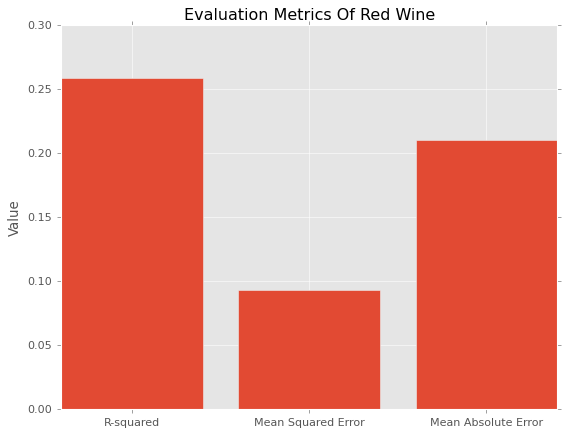

In [328]:
metrics = ['R-squared', 'Mean Squared Error', 'Mean Absolute Error']
values = [r2, mse, mae]

plt.bar(metrics, values)
plt.ylabel('Value')
plt.title('Evaluation Metrics Of Red Wine')
plt.show()

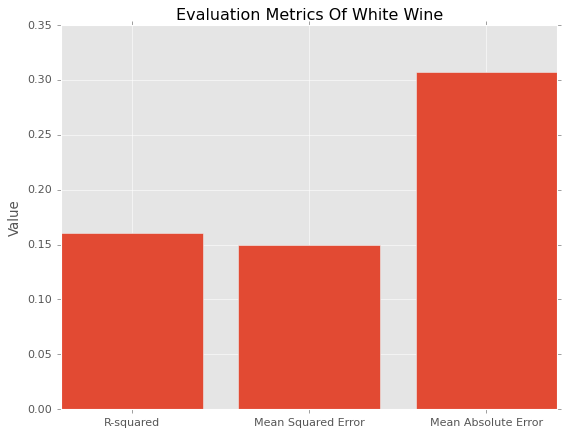

In [329]:
metrics = ['R-squared', 'Mean Squared Error', 'Mean Absolute Error']
values = [r21, mse1, mae1]

plt.bar(metrics, values)
plt.ylabel('Value')
plt.title('Evaluation Metrics Of White Wine')
plt.show()

## Logistics Regression

In [330]:
# Create logistic regression
log_reg= LogisticRegression()

# Training variable
log_reg.fit(X_train, y_train)

# Prediction
log_reg_pred = log_reg.predict(X_test)

# Accurance testing
log_reg_acc = accuracy_score(log_reg_pred, y_test)
print("Test accuracy of red wine is: {:.2f}%".format(log_reg_acc*100))

Test accuracy of red wine is: 86.56%


In [331]:
# Create logistic regression
log_reg1= LogisticRegression()

# Training variable
log_reg1.fit(X1_train, y1_train)

# Prediction
log_reg1_pred = log_reg1.predict(X_test)

# Accurance testing
log_reg1_acc = accuracy_score(log_reg1_pred, y_test)
print("Test accuracy of white wine is: {:.2f}%".format(log_reg1_acc*100))

Test accuracy of white wine is: 86.25%


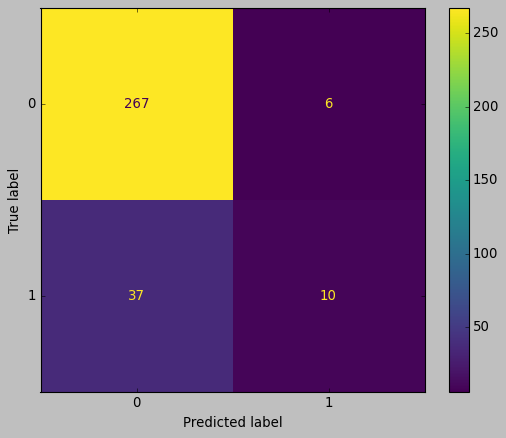

In [224]:
#Confusion matrix
style.use('classic')
cm = confusion_matrix(y_test, log_reg_pred, labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=log_reg.classes_)
disp.plot()

In [235]:
style.use('classic')
cm1 = confusion_matrix(y1_test, log_reg1_pred, labels=log_reg1.classes_)
disp1 = ConfusionMatrixDisplay(confusion_matrix= cm1, display_labels=log_reg1.classes_)
disp1.plot()

ValueError: Found input variables with inconsistent numbers of samples: [980, 320]